#### Author: Hiren Patel

#### Task: Predict the percentage of an student based on the no. of study hours.

#### Library used: Numpy, Pandas, Matplotlib, Scikit-Learn

#### GIven By: The Spark Foundation

In [1]:
### Import required Libraries

In [3]:
import numpy as np
import pandas as pd

In [4]:
## for visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style = "darkgrid"

In [7]:
## for prediction

In [117]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [9]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
print('Data retrived successfully')

Data retrived successfully


In [12]:
df.head() ##checking dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
df.shape ## There are 25 rows and 2 columns in the dataset

(25, 2)

In [17]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [21]:
df.info() ## no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [22]:
## lets check corelation of dataset

In [23]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [27]:
## Visualizing data is crucial part when we need to know the data set, relation
## I am using matplotlib and seaborn here
## by using these two libraries we can create any type of plot with heavy customization

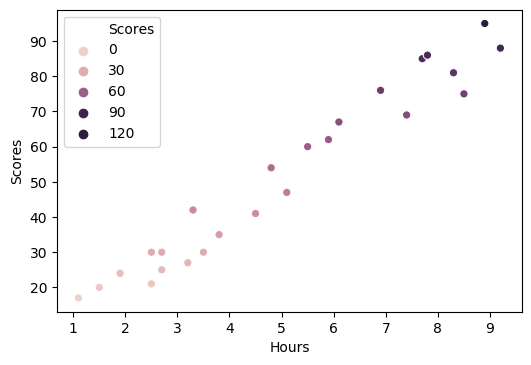

In [51]:
plt.figure(figsize=(6,4), dpi=100)
sns.scatterplot(x = 'Hours', y = 'Scores', data=df, hue='Scores')
plt.show()

In [90]:
## seperating the data to X and y

In [64]:
X = df.drop('Scores', axis=1)

In [65]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [66]:
y = df['Scores']

In [67]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

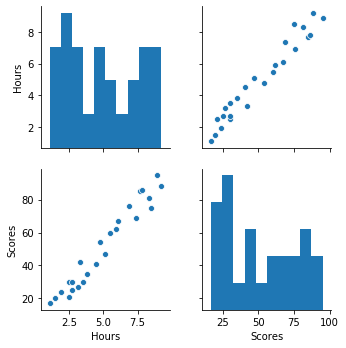

In [89]:
sns.pairplot(df)

In [81]:
## perform train, test split

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0 )

## Explanation:
## train_test_split(): this procedure can be used for estimate the performance of ML algorithm
## X = X here is our feature column
## y = y here is labels or target variable
## test_size = percentage of data should go to yje test set (maintain 30% or 20%)
## random_state is same as seed in numpy. we can use any number here

In [84]:
len(df)

25

In [85]:
len(X_train)

17

In [86]:
len(y_train)

17

In [87]:
len(X_test)

8

In [88]:
len(y_test)

8

In [93]:
## we have seprate our data in to the train and test data now it is time to train our algorithm

In [94]:
## lets make instance of linear regression first

In [95]:
model = LinearRegression()

In [97]:
model.fit(X_train, y_train)
print('Model Trained')

Model Trained


In [98]:
## ploting the regression line

In [101]:
line = model.coef_*X+model.intercept_

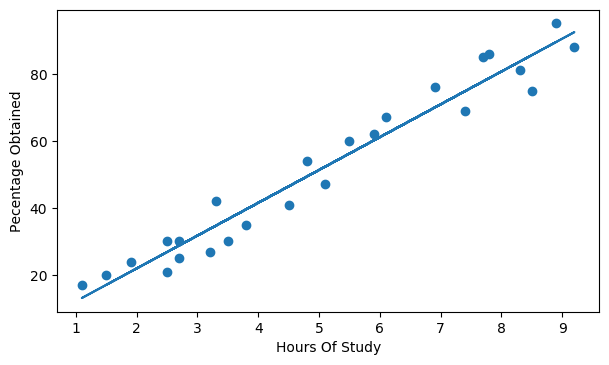

<Figure size 432x288 with 0 Axes>

In [128]:
## for the test data
plt.figure(figsize=(7,4), dpi=100)
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel('Hours Of Study')
plt.ylabel('Pecentage Obtained')
plt.show()
plt.savefig('testfig')

In [109]:
## Yes!! seems our algorithm is trained now it's time to prediction

In [110]:
print(X_test) 
y_pred = model.predict(X_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8


In [111]:
## Actual vs predicted

In [112]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


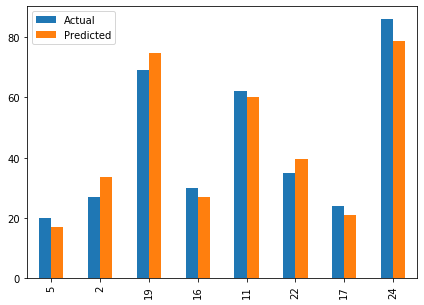

<Figure size 432x288 with 0 Axes>

In [127]:
df.plot(kind = 'bar', figsize = (7,5))
plt.show()
plt.savefig('Actual vs Predicted')

In [113]:
## let's test with manual data

In [122]:
hrs = [[9.25]] ## given in question
prediction = model.predict(hrs)
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


In [119]:
## estimation of mean error

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.4197278080276545
